In [1]:
"""
Example of building an autoencoder as a multi-layer
perceptron in PyTorch.

"""

import torch
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.optim as optim
import time

D:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


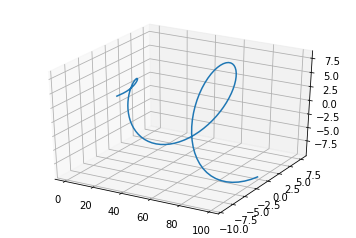

In [2]:
# Number of samples
n_samples=100

# Number of dimensions
nd=3

# Generate spiral cone
X=np.zeros([n_samples,nd])
for i in range(0,n_samples):
    X[i,0]=i
    X[i,1]=np.sqrt(i)*np.cos(i/9)
    X[i,2]=np.sqrt(i)*np.sin(i/9)
    
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X[:,0],X[:,1],X[:,2])
plt.show()

In [3]:
Xt=torch.tensor(X,dtype=torch.float32)

N_hidden=20  # Number of dimensions of hidden layer

# Use the nn package to define a model as a sequence of layers. 
# nn.Sequential is a Module which contains other Modules, 
# and applies them in sequence to produce its output. 
# Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(nd, N_hidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(N_hidden, 1),
    torch.nn.Linear(1, N_hidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(N_hidden,nd)
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        m.weight.data.uniform_(-1,1)
        m.bias.data.fill_(0.01)

model.apply(init_weights)

loss_fn = torch.nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [4]:
# Number of samples per batch
# Must divide number of samples exactly
batch_size=25

# Number of complete passes through all data
n_epochs=15000

# Create a random number generator to make permutations
#rng=np.random.default_rng()

start_time=time.perf_counter()

for ep in range(n_epochs):
    # Randomly permute the data so it is presented
    # in a different order in each epoch
    perm=np.random.permutation(n_samples)
    
    # Total loss is sum over all batches
    total_loss=0
    
    for b in range(round(n_samples/batch_size)):
        # Pick out the b-th chunk of the data
        batch_perm=perm[b*batch_size:(b+1)*batch_size]
        y_pred = model(Xt[batch_perm])
    
        loss = loss_fn(y_pred, Xt[batch_perm])
        total_loss+=loss.item()
   
        # Zero the gradients before running the backward pass.
        model.zero_grad()
    
        # Compute gradients. 
        loss.backward()
    
        # Use the optimizer to update the weights
        optimizer.step()
            
    if ((ep+1)%100==0):  # Print every 100th epoch
        print(ep+1, total_loss)
 
end_time=time.perf_counter()
print("Total time spent optimizing: {:0.1f}sec.".format(end_time-start_time))

100 3607.3262939453125
200 2797.3818969726562
300 2300.4706420898438
400 1897.2964782714844
500 1540.2548217773438
600 1258.0213928222656
700 1026.6331481933594
800 836.8880920410156
900 680.8895263671875
1000 553.2652931213379
1100 449.0783348083496
1200 362.51860427856445
1300 292.05186462402344
1400 234.83910751342773
1500 188.55764770507812
1600 151.36472129821777
1700 121.69228553771973
1800 97.6742935180664
1900 78.91842651367188
2000 64.34272193908691
2100 52.69323921203613
2200 43.62776184082031
2300 36.51475381851196
2400 30.858619213104248
2500 26.224284172058105
2600 22.600680351257324
2700 19.6450092792511
2800 17.04297161102295
2900 14.771045446395874
3000 12.501635909080505
3100 10.725229024887085
3200 9.199219584465027
3300 7.882539391517639
3400 6.634514570236206
3500 5.664790749549866
3600 4.792952537536621
3700 4.339734971523285
3800 4.180940866470337
3900 3.002859652042389
4000 2.5876315236091614
4100 2.2358897626399994
4200 1.9277806878089905
4300 1.7827214896678925

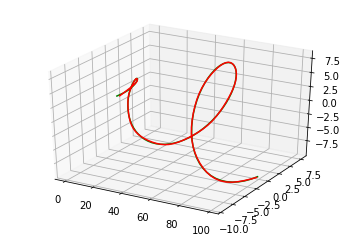

In [5]:
# Apply model to whole set
y_pred=model(Xt)
Y=y_pred.detach().numpy()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X[:,0],X[:,1],X[:,2],color='green')
ax.plot(Y[:,0],Y[:,1],Y[:,2],color='red')
plt.show()

# To encode, use first modules in model:
y=model[0:3](Xt)

# To decode use the rest:
x_new=model[3:](y)
